# **Lending Club Loan Approval Dataset**
## 1.Introduction: 
Lending Club is an electronic peer-to-peer lending platform that offers loans. Indivduals who are in need of loans will start the loan application on lending club website. One has to provide their annual income, fico scores, address details, delinq info, loan term etc. Lending club decides on loan approval based on the details provided by the individual. We are trying to analyze the data using python libraries such as pandas,numpy,seaborn and sklearn to predict the credit worthiness of the borrower so that lending club will decide on loan approval.For this project we are using the previously approved loans by the lending club to train the supervised learning models and predcit if a customer can repay the loan or not.

## 2. Examine Dataset:
Source of data is from the data world. The dataset consists of 42535 records and 115 variables. Datatypes for the variables have int, float and object type. Some of the columns are removed from the dataset as those columns can cause data leak from the future. On examining the data it is understood that it has nulls and outliers too. After performing pre-processing and cleaning data we ended up with 22 variables and 34000 records. Various visizulations are ploted to understood the data and some conclusions were drawn which can be explained going on.
## 2.1. Measurement Scales:
Types of variables that are used for modeling has been categorized.
- Ordinal Values:
    - grade
    - emp_length
    - term
- Nominal Values:
    - home_ownership
    - verification_status
    - purpose
    - addr_state
    - application_type
    - initial_list_status
  
## 2.2. Variable types: 
- Target (dependent) variable is the loan_status variable. This is considered as the binomial classification problem as target variable can be "Fully Paid off" or "Charged Off".

- Independent variables has both continuous and discrete types. Discrete variables are term and home_ownership. 
Continuous variables are loan_amnt,annual_inc,rev_utli,rev_balance, soon. 
-Univariate and Bivariate analysis is performed to under the data much better and to identify the relation ship.


In [1]:
# Loading necessary variables:

import pandas as pd
import numpy as np
pd.set_option("display.max_rows",100)
pd.set_option("display.max_columns",100)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import recall_score ,precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, accuracy_score,plot_confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
#from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import xgboost as xgb

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Load dataset into dataframe
### Datasource: https://data.world/jaypeedevlin/lending-club-loan-data-2007-11

In [3]:
#loans_df = pd.read_csv("lending_club_loans.csv",skiprows=1)
loans_df = pd.read_csv('lending_club_loans.csv',skiprows=1, low_memory=False)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,...,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-2015,171.62,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,NaN,NaN,3.0,0.0,1687.0,9.4%,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,735.0,739.0,2.0,NaN,NaN,2.0,0.0,2956.0,98.5%,10.0,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-2014,649.91,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,690.0,694.0,1.0,35.0,NaN,10.0,0.0,5598.0,21%,37.0,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-2015,357.48,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://lendingclub.c

In [4]:
# check for data information:
loans_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Columns: 115 entries, id to total_il_high_credit_limit
dtypes: float64(90), object(25)
memory usage: 37.3+ MB


In [5]:
# Check for nulls:
loans_df.isnull().sum()


id                                0
member_id                         3
loan_amnt                         3
funded_amnt                       3
funded_amnt_inv                   3
                              ...  
tax_liens                       108
tot_hi_cred_lim               42538
total_bal_ex_mort             42538
total_bc_limit                42538
total_il_high_credit_limit    42538
Length: 115, dtype: int64

In [6]:
#Check distribution of target variable, we are going to consider only Fully Paid, Charged Off for prediction
loans_df['loan_status'].value_counts()

Fully Paid                                             33586
Charged Off                                             5653
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Current                                                  513
In Grace Period                                           16
Late (31-120 days)                                        12
Late (16-30 days)                                          5
Default                                                    1
Name: loan_status, dtype: int64

# 3. Pre-Processing:

## 3.1. Removing nulls and not needed columns

### Drop not needed columns:
- We don't need columns that leaks information from the future (after the loan has already been funded),
- contains redundant information
- No use for modeling

* After analyzing the columns and considering the model we are trying to build, we can remove following features 
    
     - sub_grade — contains redundant information that is already in the grade column
     - emp_title — requires other data and a lot of processing to become potentially useful
     - url
     - desc
     - zip_code – mostly redundant with the addr_state column since only the first 3 digits of the 5 digit zip code are visible.
     
* Leaks data from the future:
    - funded_amnt, funded_amnt_inv, issued_d, pymnt_plan, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int,total_rec_late_fee, recoveries,collection_recovery_fee, last_pymnt_d, last_pymnt_amnt


In [7]:
#Remove nulls and not needed columns
#Columns that have nulls more thatn 50% of them are removed.
loans_df.dropna(thresh=len(loans_df) / 2,axis=1,inplace=True) 

# 58 columns are left after droping nulls.

# Columns that leaks data into the future are droped. id and member_id kept for ETL
#'id','member_id','int_rate'
drop_columns_list = ['funded_amnt','funded_amnt_inv','sub_grade','emp_title','issue_d','pymnt_plan',
                 'zip_code','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv',
                 'total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries',
                  'collection_recovery_fee', 'last_pymnt_d','last_pymnt_amnt','pub_rec_bankruptcies','title','url','desc']

loans_df.drop((drop_columns_list),inplace=True,axis=1)


# creatng a fico averge column by combining fico_range_high and fico_range_low:
loans_df['fico_average'] = (loans_df['fico_range_high'] + loans_df['fico_range_low']) / 2

# droping fico_range_high and fico_range_low:
drop_cols = ['fico_range_low','fico_range_high','last_fico_range_low', 'last_fico_range_high']
loans_df.drop(drop_cols,inplace=True, axis=1)

# removing nulls
loans_df.dropna(inplace=True)



In [8]:
loans_df.shape

(41221, 33)

In [9]:
loans_df.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
term                          0
int_rate                      0
installment                   0
grade                         0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
last_credit_pull_d            0
collections_12_mths_ex_med    0
policy_code                   0
application_type              0
acc_now_delinq                0
chargeoff_within_12_mths      0
delinq_amnt                   0
tax_lien

### Export data to CSV for ETL

In [10]:
# We will use this data to do ETL(store in Database)
loans_df.to_csv("filtered_loans.csv",index=False)

## 3.2. pre-processing for machine modeling
### 3.2.1 Remove columns that have only one unique value

In [11]:
#We needed id and member_id for ETL but not for modeling. Hence delete those two columns
#id — randomly generated field by LendingClub for unique identification purposes only.
#member_id — also randomly generated field by LendingClub for identification purposes only.

# Value counts shows there is only one unique value in these columns hence deleting them
for col in ['tax_liens','initial_list_status','delinq_amnt','chargeoff_within_12_mths',
           'acc_now_delinq','application_type','collections_12_mths_ex_med','policy_code']:
    print(col)
    print(loans_df[col].value_counts())
    print( "---------- ")

# Droping columns after value counts as these columns dont have much information:
no_list=['id','member_id','tax_liens','initial_list_status','delinq_amnt','chargeoff_within_12_mths',
           'acc_now_delinq','application_type','collections_12_mths_ex_med','policy_code']
loans_df.drop((no_list),inplace=True,axis=1)
loans_df.dropna(inplace=True)

tax_liens
0.0    41221
Name: tax_liens, dtype: int64
---------- 
initial_list_status
f    41221
Name: initial_list_status, dtype: int64
---------- 
delinq_amnt
0.0    41221
Name: delinq_amnt, dtype: int64
---------- 
chargeoff_within_12_mths
0.0    41221
Name: chargeoff_within_12_mths, dtype: int64
---------- 
acc_now_delinq
0.0    41219
1.0        2
Name: acc_now_delinq, dtype: int64
---------- 
application_type
INDIVIDUAL    41221
Name: application_type, dtype: int64
---------- 
collections_12_mths_ex_med
0.0    41221
Name: collections_12_mths_ex_med, dtype: int64
---------- 
policy_code
1.0    41221
Name: policy_code, dtype: int64
---------- 


In [12]:
loans_df.shape

(41221, 23)

## Pandas Profiler:


In [13]:
#import pandas_profiling as pp
#profile = pp.ProfileReport(loans_df)
#profile.to_file("output.html")

## Hyperlink to output.html
[Pandas Profile Report](./output.html)

### 3.2.2 Feature Engineering:

In [14]:
# Converting categorical loan_status value to the numerical:
loans_df = loans_df[(loans_df["loan_status"] == "Fully Paid") | (loans_df["loan_status"] == "Charged Off")]
mapping_dictionary = {"loan_status":{ "Fully Paid": 1, "Charged Off": 0}}
loans_df = loans_df.replace(mapping_dictionary)

#Get 3 letter month 
loans_df['earliest_cr_line_month'] = loans_df['earliest_cr_line'].apply(lambda s: s[:3])

#Get 3 letter month 
loans_df['last_credit_pull_d_month'] = loans_df['last_credit_pull_d'].apply(lambda s: s[:3])

#delete the original columns with month and year
loans_df = loans_df.drop(["earliest_cr_line","last_credit_pull_d"],axis=1)

#Remove % from the value and convert it to float
loans_df['revol_util'] = loans_df['revol_util'].str.rstrip('%').astype('float')
loans_df['int_rate'] = loans_df['int_rate'].str.rstrip('%').astype('float')

#Just get number 36 and 60 from the column
loans_df['term'] = loans_df['term'].apply(lambda x:x.split()[0])
loans_df['term'] = loans_df['term'].astype('int')

# loan status by region:
regions = {'Pacific':['OR','AK','HI','WA','CA'],
          'Midwest':['NE','MN','MO','WI','IL','MI','IN','OH'],
          'South':['TX','AR','LA','KY','TN','MS','AL','WV','MD','DE','VA','NC','SC','GA','FL','DC'],
          'Northeast':['ME','VT','NH','NY','PA','NJ','CT','MA','RI'],
          #'Mountain':['UT','CO','AZ','NM','MT','ID','WY','NV'],
          'Plains':['KS','IA','ND','SD','OK']}

def get_regionByState(state):
    if state in regions['Pacific']:
        return 'Pacific'
    elif state in regions['Midwest']:
        return 'Midwest'
    elif state in regions['South']:
        return 'South'
    elif state in regions['Northeast']:
        return 'Northeast'
    elif state in regions['Plains']:
        return 'Plains'
    else:
        return 'Mountain'

loans_df['region'] = loans_df.addr_state.map(get_regionByState) 
#Will keep addr_state for visualization and drop later
#loans_df = loans_df.drop('addr_state',axis=1)

#lambda function
region_of_state=(lambda x: "Plains"  if x in regions['Plains'] else 
                          ("Midwest" if x in regions['Midwest'] else 
                          ("Pacific" if x in regions['Pacific'] else 
                          ("South" if x in regions['South'] else 
                          ("Northeast" if x in regions['Northeast'] else
                          "Mountain")))))



### 3.2.3 One hot encoding

In [15]:
# Encoding "home_ownership", "verification_status","purpose",'region' columns:
#Keeping these columns for visualizations and then delete
nominal_columns = ["home_ownership", "verification_status","purpose",'region']
dummy_df = pd.get_dummies(loans_df[nominal_columns],drop_first=True)
loans_df = pd.concat([loans_df, dummy_df], axis=1)

#loans_df = loans_df.drop(nominal_columns, axis=1)

### 3.2.4 Label Encoding

In [16]:
# Label encoding "grade", 'last_credit_pull_d_month','earliest_cr_line_month','emp_length' columns:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
loans_df['grade'] = le.fit_transform(loans_df['grade'])
loans_df['last_credit_pull_d_month'] = le.fit_transform(loans_df['last_credit_pull_d_month'])
loans_df['earliest_cr_line_month'] = le.fit_transform(loans_df['earliest_cr_line_month'])
loans_df['emp_length'] = le.fit_transform(loans_df['emp_length'])


In [17]:
loans_df

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,fico_average,earliest_cr_line_month,last_credit_pull_d_month,region,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,region_Mountain,region_Northeast,region_Pacific,region_Plains,region_South
0,5000.0,36,10.65,162.87,1,1,RENT,24000.0,Verified,1,credit_card,AZ,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,737.0,4,11,Mountain,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2500.0,60,15.27,59.83,2,10,RENT,30000.0,Source Verified,0,car,GA,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,742.0,0,11,South,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2400.0,36,15.96,84.33,2,1,RENT,12252.0,Not Verified,1,small_business,IL,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,737.0,9,11,Midwest,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,10000.0,36,13.49,339.31,2,1,RENT,49200.0,Source Verified,1,other,CA,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,692.0,3,0,Pacific,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
5,5000.0,36,7.90,156.46,0,3,RENT,36000.0,Source Verified,1,wedding,AZ,11.20,0.0,3.0,9.0,0.0,7963.0,28.3,12.0,732.0,9,4,Mountain,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39730,3000.0,36,7.75,93.67,0,9,OWN,50000.0,Not Verified,1,vacation,WA,5.35,0.0,0.0,17.0,0.0,21050.0,0.7,29.0,762.0,11,1,Pacific,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
39731,3000.0,36,7.75,93.67,0,1,OWN,125000.0,Not Verified,1,home_improvement,WA,2.14,0.0,0.0,15.0,0.0,21050.0,1.0,24.0,762.0,11,1,Pacific,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
39732,4000.0,36,10.91,130.79,2,0,RENT,18000.0,Not Verified,1,car,VA,18.00,0.0,1.0,4.0,0.0,5533.0,79.6,5.0,707.0,1,6,South,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
39733,2000.0,36,8.70,63.32,1,10,RENT,70000.0,Not Verified,1,credit_card,NY,6.07,0.0,1.0,13.0,0.0,5967.0,19.8,17.0,712.0,1,1,Northeast,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### 3.3.5. Outlier detection and removal:

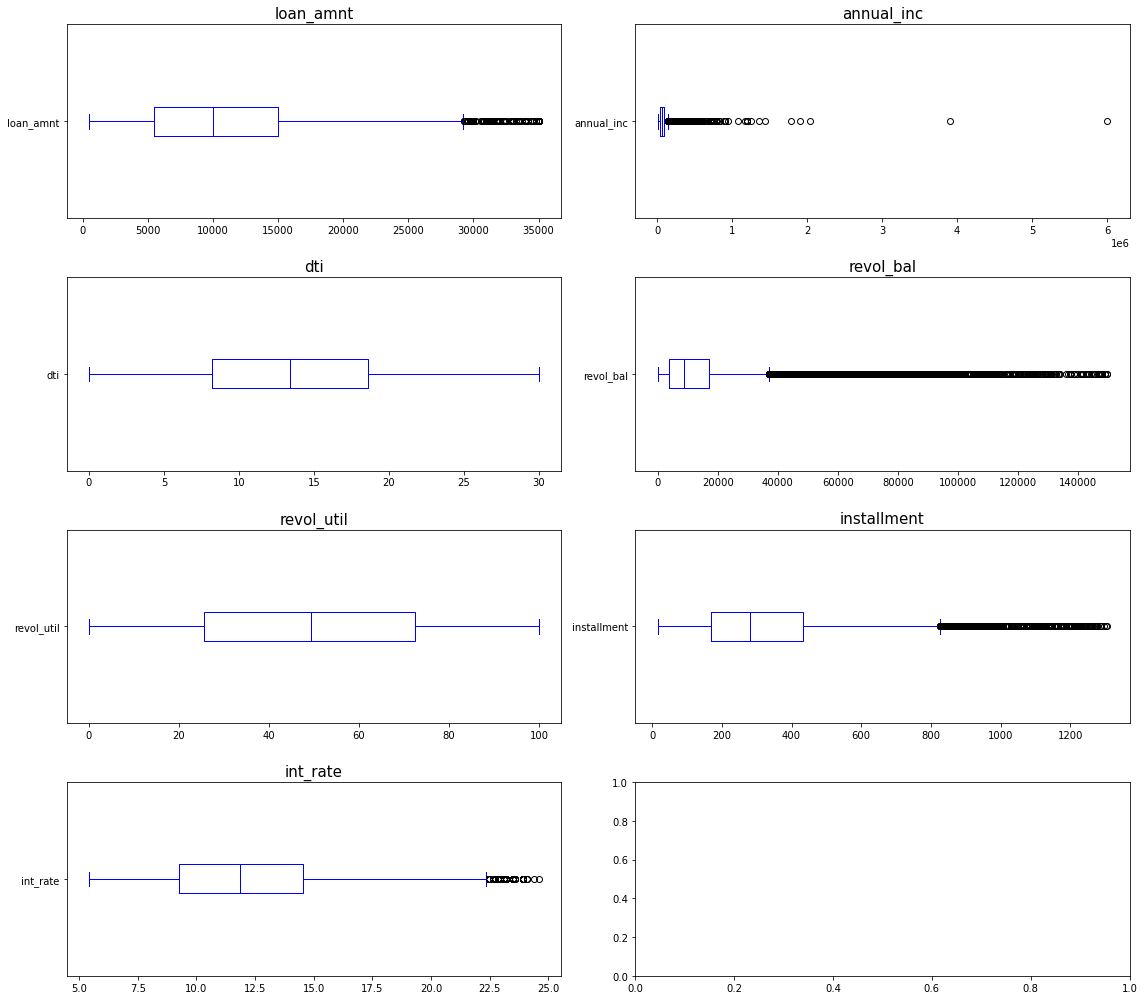

In [18]:
numerical_features = ['loan_amnt', 'annual_inc', 'dti', 'revol_bal','revol_util', 'installment', 'int_rate']

fig, axes = plt.subplots(4,2,figsize=(16, 14))
axes = np.ravel(axes)

for i, c in enumerate(numerical_features):
    hist = loans_df[c].plot(kind = 'box', ax=axes[i],color='blue', vert=False)
    axes[i].set_title(c, fontsize=15)
    
plt.tight_layout()
plt.show()

Observations from box plots:

1. annual_income,int_rate,revol_bal and installment columns has extreme outliers that can change the performance of the models. Hence removing outliers.


In [19]:
from scipy import stats
z = np.abs(stats.zscore(loans_df[numerical_features]))  
threshold = 3
loans_df = loans_df[(z < 3).all(axis=1)]    #tried with 2.5 too
loans_df

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,fico_average,earliest_cr_line_month,last_credit_pull_d_month,region,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,region_Mountain,region_Northeast,region_Pacific,region_Plains,region_South
0,5000.0,36,10.65,162.87,1,1,RENT,24000.0,Verified,1,credit_card,AZ,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,737.0,4,11,Mountain,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2500.0,60,15.27,59.83,2,10,RENT,30000.0,Source Verified,0,car,GA,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,742.0,0,11,South,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2400.0,36,15.96,84.33,2,1,RENT,12252.0,Not Verified,1,small_business,IL,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,737.0,9,11,Midwest,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,10000.0,36,13.49,339.31,2,1,RENT,49200.0,Source Verified,1,other,CA,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,692.0,3,0,Pacific,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
5,5000.0,36,7.90,156.46,0,3,RENT,36000.0,Source Verified,1,wedding,AZ,11.20,0.0,3.0,9.0,0.0,7963.0,28.3,12.0,732.0,9,4,Mountain,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39730,3000.0,36,7.75,93.67,0,9,OWN,50000.0,Not Verified,1,vacation,WA,5.35,0.0,0.0,17.0,0.0,21050.0,0.7,29.0,762.0,11,1,Pacific,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
39731,3000.0,36,7.75,93.67,0,1,OWN,125000.0,Not Verified,1,home_improvement,WA,2.14,0.0,0.0,15.0,0.0,21050.0,1.0,24.0,762.0,11,1,Pacific,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
39732,4000.0,36,10.91,130.79,2,0,RENT,18000.0,Not Verified,1,car,VA,18.00,0.0,1.0,4.0,0.0,5533.0,79.6,5.0,707.0,1,6,South,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
39733,2000.0,36,8.70,63.32,1,10,RENT,70000.0,Not Verified,1,credit_card,NY,6.07,0.0,1.0,13.0,0.0,5967.0,19.8,17.0,712.0,1,1,Northeast,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## 4. Descriptive Statistics:

In [20]:
loans_df.describe()

,loan_amnt,term,int_rate,installment,grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,fico_average,earliest_cr_line_month,last_credit_pull_d_month,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,region_Mountain,region_Northeast,region_Pacific,region_Plains,region_South
count,36293.000000,36293.000000,36293.000000,36293.000000,36293.000000,36293.000000,36293.000000,36293.000000,36293.000000,36293.000000,36293.000000,36293.000000,36293.000000,36293.000000,36293.000000,36293.000000,36293.000000,36293.000000,36293.000000,36293.000000,36293.000000,36293.000000,36293.000000,36293.000000,36293.000000,36293.000000,36293.000000,36293.000000,36293.000000,36293.000000,36293.000000,36293.000000,36293.000000,36293.000000,36293.000000,36293.000000,36293.000000,36293.000000,36293.000000,36293.000000,36293.000000,36293.000000,36293.000000
mean,10615.848097,42.020334,11.914598,309.956398,1.542198,4.035021,64296.725626,0.859201,13.301772,0.147439,0.868349,9.201637,0.055438,11507.327060,48.632120,21.729865,716.403604,5.686110,7.391591,0.000028,0.002590,0.074367,0.493732,0.256964,0.301215,0.128978,0.471055,0.008294,0.072383,0.009258,0.056457,0.017689,0.014989,0.100102,0.002480,0.044003,0.009478,0.024881,0.069407,0.244785,0.217700,0.016257,0.320475
std,6600.741195,10.404162,3.636128,188.044244,1.359564,3.227703,34193.392180,0.347818,6.660476,0.495434,1.064323,4.343525,0.238505,10851.197986,28.265419,11.250619,35.636895,3.510318,3.853328,0.005249,0.050827,0.262371,0.499968,0.436965,0.458792,0.335180,0.499168,0.090692,0.259125,0.095773,0.230806,0.131822,0.121511,0.300140,0.049737,0.205105,0.096896,0.155764,0.254149,0.429966,0.412688,0.126462,0.466666
min,500.000000,36.000000,5.420000,15.690000,0.000000,0.000000,4000.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,632.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5250.000000,36.000000,8.940000,165.380000,0.000000,1.000000,40000.000000,1.000000,8.170000,0.000000,0.000000,6.000000,0.000000,3580.000000,25.300000,13.000000,687.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9600.000000,36.000000,11.780000,274.450000,1.000000,3.000000,57000.000000,1.000000,13.390000,0.000000,1.000000,9.000000,0.000000,8500.000000,49.000000,20.000000,712.000000,6.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15000.000000,60.000000,14.350000,410.020000,2.000000,6.000000,80000.000000,1.000000,18.570000,0.000000,1.000000,12.000000,0.000000,15964.000000,72.100000,28.000000,742.000000,9.000000,11.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,33425.000000,60.000000,22.940000,948.470000,6.000000,10.000000,262000.000000,1.000000,29.990000,11.000000,8.000000,42.000000,4.000000,61126.000000,99.900000,90.000000,827.000000,11.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000

### Observations form describe:
1. Loan amount varies in the range of 500 to 35000 and median is at 9600. This implies that most of the loans borrowed between 500 to 10000.
2. Borrowers annual income is varies largely as there are borrowers who earn around 4000 and goes up to 262000. 
3. delinq_2years, which means borrowers that failed to pay dues for more than 30 days varies between 0 to 11. IQR3 for this is zero which signifies that borrowers that pay loan in full are more when compared to charged off. This variable could be an important factor in analyzing the loan approval as we cannot lend to some one who has delinq_2yrs value of 11.
6. fico range varies from 632 to 827 with a mean of 716. Which implies that borrower who have score above 716 has more chances of getting the loan approved.

## 4.1. Univariate analysis:

### 4.1.1. loan_status:

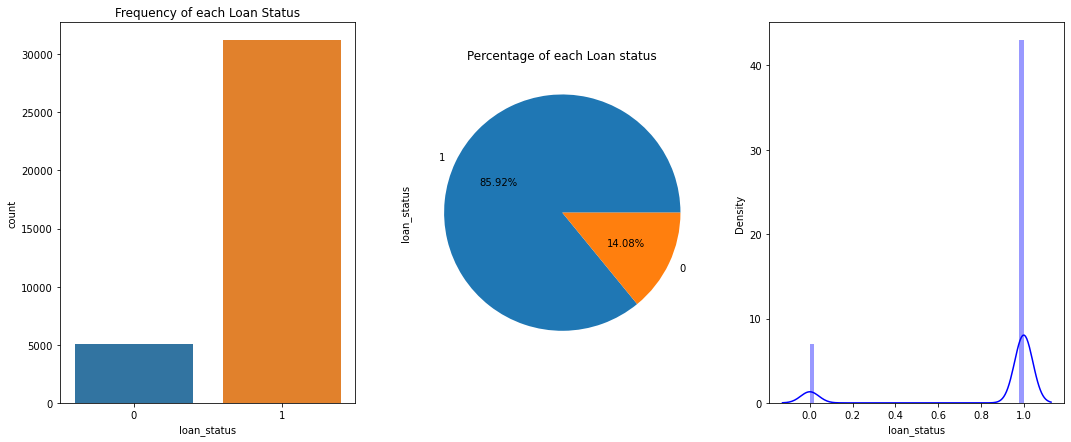

In [21]:
fig, axs = plt.subplots(1,3,figsize=(18,7))
sns.countplot(x='loan_status',data=loans_df,ax=axs[0])
axs[0].set_title("Frequency of each Loan Status")
loans_df.loan_status.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Loan status")
sns.distplot(loans_df['loan_status'],ax=axs[2],color='b')
plt.show()

1. Fully paid off loans occupy 85% of the dataset while only 15% of data is charged off.
2. Observed that only only categories, fully paid and charged off.

### 4.1.2. loan_amount:

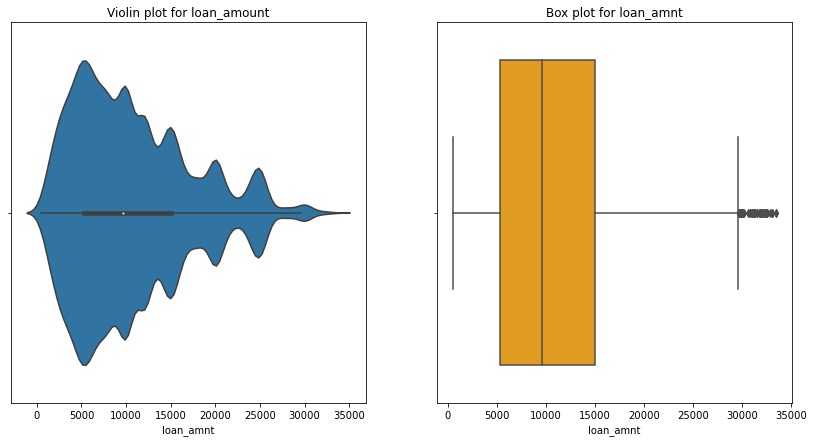

In [22]:
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.violinplot(x=loans_df["loan_amnt"],ax=axs[0] )
axs[0].set_title("Violin plot for loan_amount")
sns.boxplot(x=loans_df["loan_amnt"],ax=axs[1] ,color='orange')
axs[1].set_title("Box plot for loan_amnt")
plt.show()

1. Max loans borrowed are in range of 500 through 10000. 
2. With increase in loan amount the number of borrowers are reducing.
3. These is drastic decrease in borrowers from 25000 to 30000 range and also from 10000 to 15000 range.

### 4.1.4. fico_score:

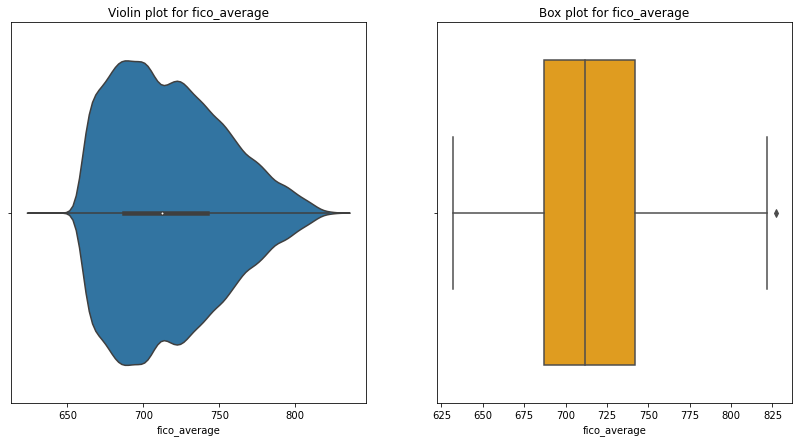

In [23]:
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.violinplot(x=loans_df["fico_average"],ax=axs[0] )
axs[0].set_title("Violin plot for fico_average")
sns.boxplot(x=loans_df["fico_average"],ax=axs[1] ,color='orange')
axs[1].set_title("Box plot for fico_average")
plt.show()

1. Average fico score range between 675 to 750.
2. Borrowers with high fico score of 800 are very few.

### 4.1.5. rev_balance:

<function matplotlib.pyplot.show(close=None, block=None)>

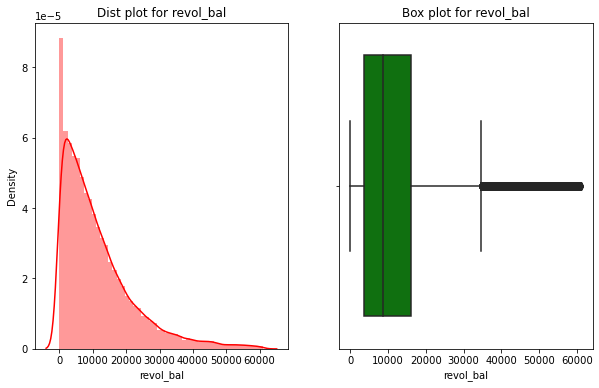

In [24]:
fig, axs = plt.subplots(1,2,figsize=(10,6))
sns.distplot(loans_df['revol_bal'],ax=axs[0],color='r')
axs[0].set_title("Dist plot for revol_bal")
sns.boxplot(x=loans_df["revol_bal"],ax=axs[1] ,color='g')
axs[1].set_title("Box plot for revol_bal")
plt.plot(figsize=(20,15))
plt.show

1. Revolving balance for 90% of the borrowers is between 0 to 20000.
2. 10% borrowers falls into the range of 20000+ categroy.

## 4.2.Bivariate analysis:

### 4.2.1. What is the relation between loan_amnt vs annual income?

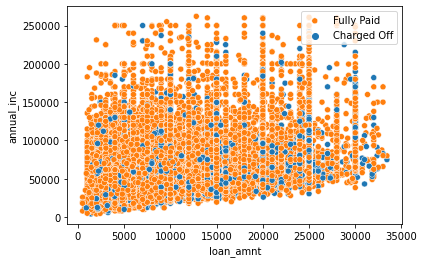

In [25]:
plt.plot(figsize=(15,6))
sns.scatterplot(y="annual_inc",x="loan_amnt", data= loans_df,hue='loan_status')
plt.legend(["Fully Paid","Charged Off"], loc ="upper right")
plt.show()

1. Charged off loans more after 20000+ loan amounts.
2. Annual income below 100K have high charged off accounts.
3. Loans between 500 to 15000 are more compared to 15000+.

### 4.2.2. What is the relation betweeen Loan amount with loan status?

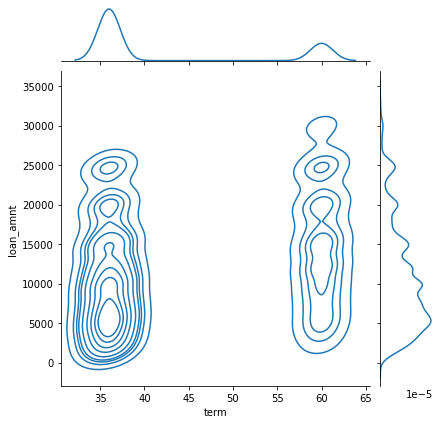

In [26]:
sns.jointplot(loans_df['term'],loans_df['loan_amnt'],kind='kde')
plt.show()

### 4.2.3. What is the relation between loan_amnt and purpose?

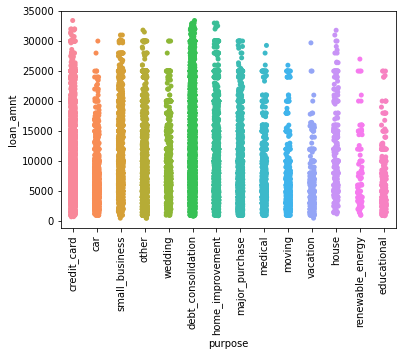

In [27]:
plt.plot(figsize=(15,10))
sns.stripplot(loans_df['purpose'], loans_df['loan_amnt'],jitter=True)
plt.xticks(rotation=90)
plt.show()

1. Highest loan amounts are taken for debt_consolidation followed by credit card, small_business.
2. Very few loans are borrowed in renewable_energy and education categories.
3. Max loan of 35000 has taken in all categories except for vacation, car and educational purposes.

### 4.2.4. What state and region has highest borrowed loans?

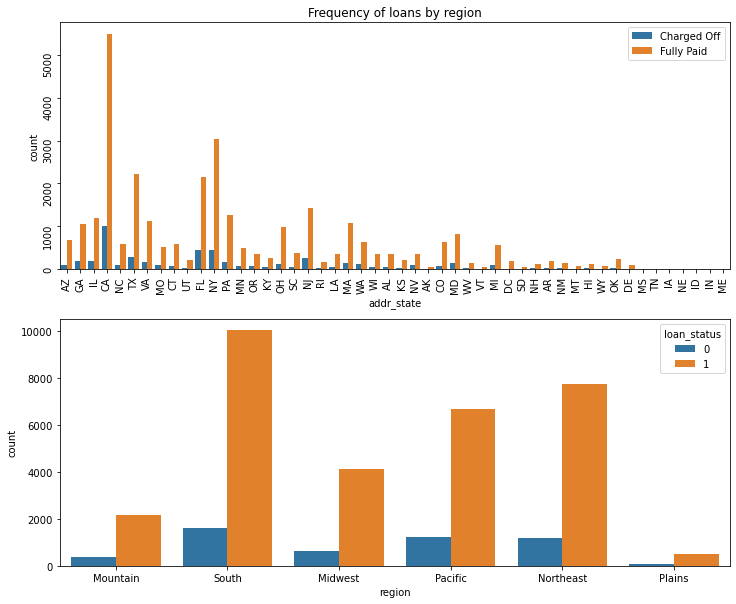

In [28]:
fig, ax = plt.subplots(2,1,figsize=(12,10))
sns.countplot(x='addr_state',data=loans_df,ax=ax[0],hue='loan_status')
ax[0].set_title("Frequency of loans by state")
ax[0].legend(["Charged Off", "Fully Paid"], loc ="upper right")
sns.countplot(x='region',data=loans_df,ax=ax[1],hue='loan_status')
ax[0].set_title("Frequency of loans by region")
ax[0].legend(["Charged Off", "Fully Paid"], loc ="upper right")
ax[0].tick_params(labelrotation=90)
plt.show()

1. California, Newyork followed by Florida has highest fully paid borrowers.
2. South region followed by northeast has highest fully paid borrowers.
3. South has very less charged off percentage when compared with pacific and northeast regions.
4. Plains has very few borrowers.

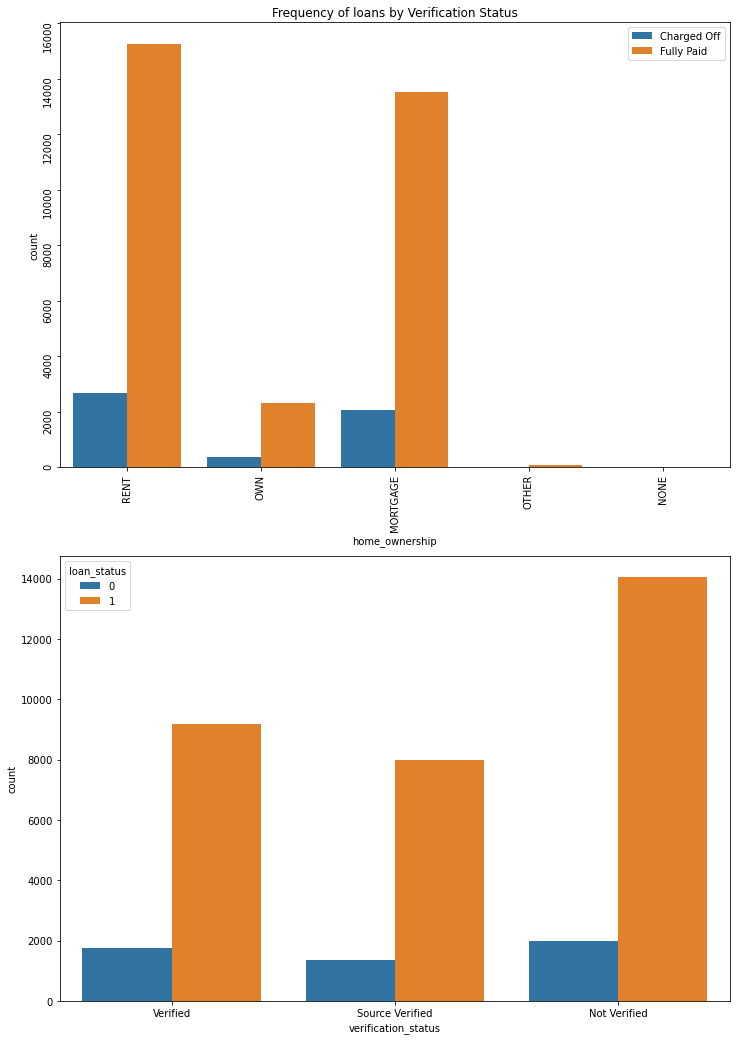

In [29]:
fig, ax = plt.subplots(2,1,figsize=(12,18))
sns.countplot(x='home_ownership',data=loans_df,ax=ax[0],hue='loan_status')
ax[0].set_title("Frequency of loans by Home Ownership")
ax[0].legend(["Charged Off", "Fully Paid"], loc ="upper right")
sns.countplot(x='verification_status',data=loans_df,ax=ax[1],hue='loan_status')
ax[0].set_title("Frequency of loans by Verification Status")
ax[0].legend(["Charged Off", "Fully Paid"], loc ="upper right")
ax[0].tick_params(labelrotation=90)
plt.show()

In [30]:
#Deleting these columns after visualizations as these are one hot encoded /label encoded
nominal_columns = ["home_ownership", "verification_status","purpose",'region']
loans_df = loans_df.drop(nominal_columns, axis=1)

loans_df = loans_df.drop('addr_state',axis=1)

### 4.4. Multi variate analysis:

#### 4.4.1. 3d MAP:

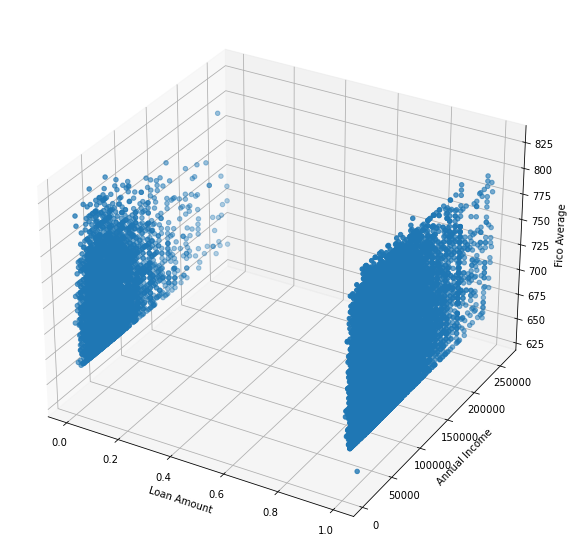

In [31]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection = '3d')

x = loans_df['loan_status']
y = loans_df['annual_inc']
z = loans_df['fico_average']

ax.scatter(x, y, z)
ax.set_xlabel("Loan Amount")
ax.set_ylabel("Annual Income")
ax.set_zlabel("Fico Average")

plt.show()


1. Clearly understood that most of the charged of borrowers are in the 5000 to 15000.
2. High annual income borrowers are very low.
3. Borrowers are more in fully paid category.

#### 4.4.2.Heatmap:

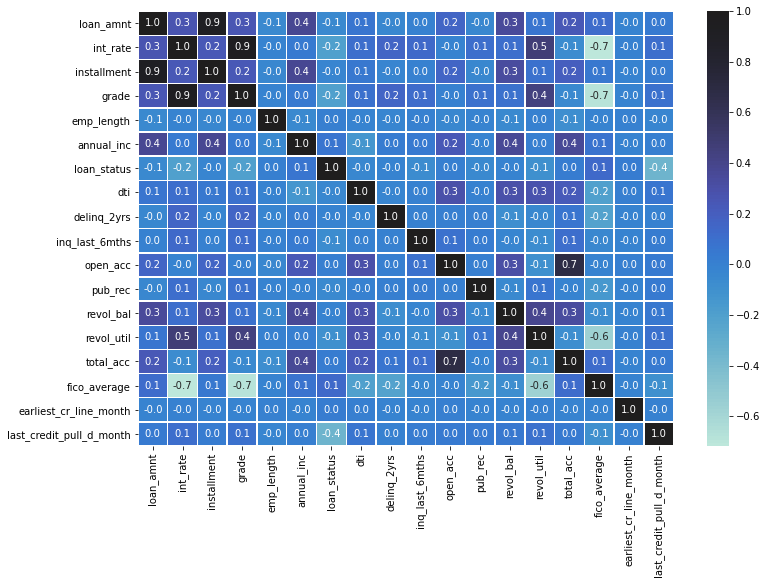

In [32]:
plt.figure(figsize=(12,8))
#sns.heatmap(loans_df.drop('loan_status',axis=1).corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )
sns.heatmap(loans_df[['loan_amnt','int_rate','installment','grade','emp_length','annual_inc','loan_status','dti','delinq_2yrs',
                      'inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','fico_average','earliest_cr_line_month','last_credit_pull_d_month']].corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )
plt.show()

1. When heatmap is plotted it is observed that
    - loan_amnt and installment are highly correlated. 
    - int_rate and grade are highly correlated.grade 
    - open_acc have 0.7 correlation. <br>
High correlation between independent variables can cause fluctations in the model as change in one can results changing in other correlated variable too.
2. open_acc (total number of open credit lines borrower hold currently), pub_rec (number of derogatroy public records) followed by revol_utli have good correlation with loan_status.
3. rev_utli is negatively correlated with fico_average by 0.6.

In [33]:
#From heatmap observation, removing these column because of high correlation
loans_df.drop(['installment','int_rate'],axis=1,inplace=True)

In [34]:
loans_df.to_csv("data_for_modeling.csv",index=False)

## 5. Feature Selection:

In [35]:
#Feature selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X1 = loans_df.drop('loan_status',axis=1)
y1 = loans_df['loan_status']

model = LogisticRegression()

#Initializing RFE model
rfe = RFE(model, n_features_to_select=8)

#Transforming data using RFE
X_rfe = rfe.fit_transform(X1,y1)  

#Fitting the data to model
model.fit(X_rfe,y1)
print(rfe.support_)
print(rfe.ranking_)

#Get the feature names where feature supports
rfe_features = X1.columns[np.where(rfe.support_ == True)[0]]
print(rfe_features)

[False False False False False False False  True False  True False False
 False False False  True False False False False False False  True False
 False False False False False False  True False  True False  True False
 False  True False False]
[28  6 18 26 29 21  4  1  7  1 31 19 10  9  8  1 33 20  2 24 32 13  1  5
 12 11 22 14 17 16  1 25  1 27  1 15  3  1 23 30]
Index(['inq_last_6mths', 'pub_rec', 'last_credit_pull_d_month',
       'purpose_credit_card', 'purpose_other', 'purpose_small_business',
       'purpose_wedding', 'region_Pacific'],
      dtype='object')


In [36]:
## X has all the variables except the target variable

In [37]:
X = loans_df.drop('loan_status',axis=1)
y = loans_df['loan_status']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [38]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X,y)
featureScores = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(fit.pvalues_),pd.DataFrame(fit.scores_)],axis=1)
featureScores.columns = ['Columns','pvalue','Score']  #naming the dataframe columns
print(featureScores.nlargest(21,'Score'))  #print 10 best features
#bfeatures = featureScores.nlargest(21,'Score')['Columns'].tolist()
bfeatures = featureScores.nlargest(9,'Score')['Columns'].tolist()

                         Columns         pvalue        Score
15      last_credit_pull_d_month   0.000000e+00  5095.992781
2                          grade  6.485235e-310  1444.168917
1                           term  3.861335e-204   941.482187
13                  fico_average  1.356561e-140   642.837970
11                    revol_util   2.500038e-81   366.674747
32        purpose_small_business   2.029039e-46   205.221101
7                 inq_last_6mths   1.297261e-39   173.879832
4                     annual_inc   3.009076e-33   144.619418
0                      loan_amnt   7.266958e-24   101.610227
9                        pub_rec   2.566079e-21    89.964959
22           purpose_credit_card   2.167679e-15    62.961809
5                            dti   7.549669e-15    60.500547
21  verification_status_Verified   8.462379e-14    55.738748
27        purpose_major_purchase   9.833579e-08    28.417989
37                region_Pacific   3.683149e-06    21.429679
19           home_owners

In [39]:
## X has features given by SelectKBest

In [40]:
#Test train split the data
#X = loans_df[rfe_features] 
X_fs = loans_df[bfeatures]
y = loans_df['loan_status']
X_train_fs,X_test_fs,y_train_fs,y_test_fs = train_test_split(X_fs,y,test_size=0.25,random_state=42)

## 6.Balancing fully paid and charged off records
- Using SMOTEEN

In [41]:
# About 86% of the loans have been fully paid(loan_staus is 1) and 14% have charged off(loan_status is 0), 
# so we have a somewhat unbalanced classification problem.
loans_df['loan_status'].value_counts(normalize=True)

1    0.859201
0    0.140799
Name: loan_status, dtype: float64

In [42]:
#SMOTE-ENN
from collections import Counter
from imblearn.combine import SMOTEENN 
from imblearn.under_sampling import EditedNearestNeighbours

#sme = SMOTEENN(random_state=42)
sme = SMOTEENN(random_state=42,enn=EditedNearestNeighbours(sampling_strategy='all'))
X_res_smoteen, y_res_smoteen = sme.fit_resample(X_train, y_train)
print('original dataset shape:', Counter(y_train))
print('Resample dataset shape', Counter(y_res_smoteen))

original dataset shape: Counter({1: 23373, 0: 3846})
Resample dataset shape Counter({0: 15385, 1: 12011})


In [43]:
#For SelectKBest features
#sme = SMOTEENN(random_state=42)
sme = SMOTEENN(random_state=42,enn=EditedNearestNeighbours(sampling_strategy='all'))
X_res_smoteen_fs, y_res_smoteen_fs = sme.fit_resample(X_train_fs, y_train_fs)
print('original dataset shape:', Counter(y_train_fs))
print('Resample dataset shape', Counter(y_res_smoteen_fs))

original dataset shape: Counter({1: 23373, 0: 3846})
Resample dataset shape Counter({0: 13486, 1: 12119})


## 7. Helper functions

In [80]:
model_comparision_list = []

In [81]:
#Function to check the performance metric for the model
def evaluate_model(model, X_train, y_train, X_test, y_test,m_name):
    _ = model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Train Precision-Recall report=",precision_recall_fscore_support(y_train, y_pred_train, average='weighted'))
    t_prs = precision_recall_fscore_support(y_test,y_pred, average='weighted')
    print("Test Precision-Recall report=" , t_prs)
    print("Train Accuracy Score=",accuracy_score(y_train,y_pred_train))
    t_acc_score= accuracy_score(y_test,y_pred)
    print("Test Accuracy Score=",t_acc_score)
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    m_roc_auc,m_auc = model_roc_auc(y_test,y_pred)
    model_comparision_dict = {"Model name":m_name,
                              "f1-score":round(t_prs[2],2),
                              "precision":round(t_prs[0],2),
                              "recall":round(t_prs[1],2),
                              "auc":round(m_auc,2),
                              "roc_auc_curve":round(m_roc_auc,2),
                              "accuracy":round(t_acc_score,2)
                             }
    model_comparision_list.append(model_comparision_dict)
    

In [46]:
#function to do precsion recall analysis, roc curve analysis for each model
from sklearn.metrics import precision_recall_curve, f1_score, auc
from sklearn.metrics import roc_curve, auc,roc_auc_score   

def model_roc_auc(y_test,y_pred):
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
    m_auc = auc(recall, precision)
    print("auc:",m_auc)
    
    fpr, tpr, thresholds = roc_curve(y_test,y_pred )
    m_roc_auc_score = roc_auc_score(y_test, y_pred)
    print("roc_auc_score:",m_roc_auc_score)
    
    fig, axs = plt.subplots(1,2,figsize=(14,6))
    #axs = np.ravel(axs)
    sns.lineplot(recall, precision, marker = '.',ax=axs[0])
    axs[0].set_xlabel('Recall')
    axs[0].set_ylabel('Precision')
    axs[0].set_title("Precison Recall Analysis")
    
    
    sns.lineplot(fpr, tpr, marker = '.',ax=axs[1])
    axs[1].set_xlabel('False Positive Rate')
    axs[1].set_ylabel('True Positive Rate')   
    axs[1].set_title("ROC Curve Analysis")
    plt.show()
    
    return (m_roc_auc_score,m_auc)

    

## 8. Machine learning models

### 8.1 Logistic Regression

- Tried running the model for all the variables except target variable and first 9 features given by the SelectKBest. There was not much change in the performance metric. F1 score 0.84, auc = 0.98 for 1st and F1 Score 0.84, auc = 0.93 for later.
-Running model on resampled data for best features given by SelectKBest has almost similar scores. with 0.77 F1 score for resampled data and 0.78 for the smote resampled data.
-Running model with resampled data and for smoteenn sampled seems  overfitted as training scores are higher than test scores.

In [82]:
pipe_lr = Pipeline([('sc', StandardScaler()),
			('lr', LogisticRegression(random_state=42))])

grid_params_lr = {'lr__penalty': ['l1', 'l2'],
		'lr__C': [1.0,0.5],
		'lr__solver': ['liblinear','newton-cg']}

gs_lr = GridSearchCV(estimator=pipe_lr,
			param_grid=grid_params_lr,
			scoring='accuracy',
			cv=10)

Train Precision-Recall report= (0.8437139368678752, 0.8691722693706602, 0.8408037186289422, None)
Test Precision-Recall report= (0.8401373771662508, 0.8681948424068768, 0.8383233058234258, None)
Train Accuracy Score= 0.8691722693706602
Test Accuracy Score= 0.8681948424068768
[[ 242 1022]
 [ 174 7636]]
              precision    recall  f1-score   support

           0       0.58      0.19      0.29      1264
           1       0.88      0.98      0.93      7810

    accuracy                           0.87      9074
   macro avg       0.73      0.58      0.61      9074
weighted avg       0.84      0.87      0.84      9074

auc: 0.939427709688818
roc_auc_score: 0.5845882834405743


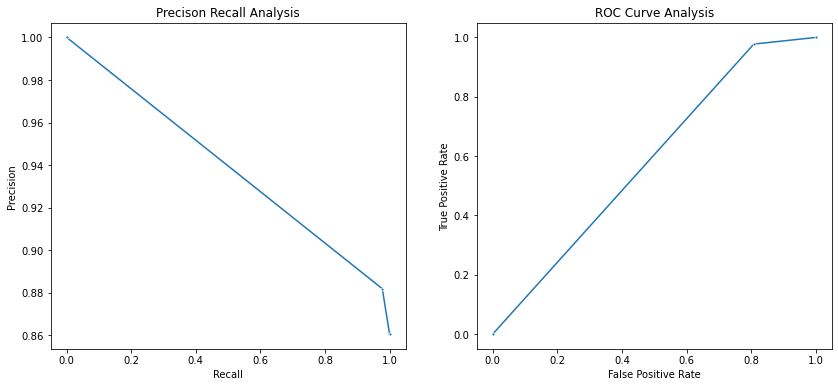

In [83]:
### Logistic Regression with imbalanced data and all the features except target variable
evaluate_model(gs_lr, X_train, y_train, X_test, y_test,"Logistic Regression-All Features")

Train Precision-Recall report= (0.8392553667639284, 0.8669679268158271, 0.8363798070722567, None)
Test Precision-Recall report= (0.8421825447462606, 0.8692968922195283, 0.8376569293838924, None)
Train Accuracy Score= 0.8669679268158271
Test Accuracy Score= 0.8692968922195283
[[ 229 1035]
 [ 151 7659]]
              precision    recall  f1-score   support

           0       0.60      0.18      0.28      1264
           1       0.88      0.98      0.93      7810

    accuracy                           0.87      9074
   macro avg       0.74      0.58      0.60      9074
weighted avg       0.84      0.87      0.84      9074

auc: 0.9391295730917991
roc_auc_score: 0.5809183495680643


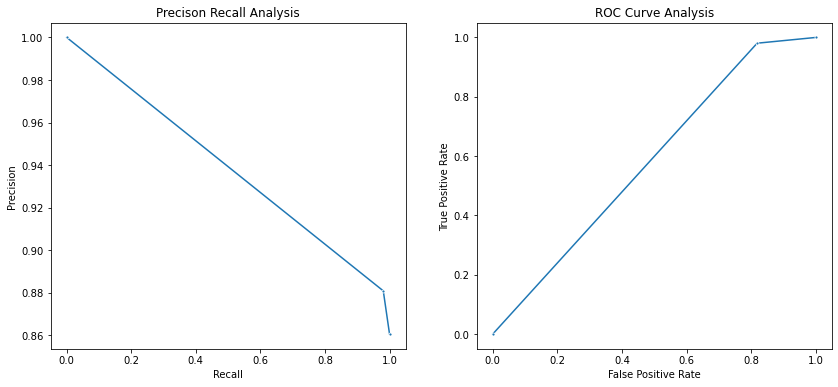

In [84]:
##Evaluating with features given by SelectKBest for Logistic:
evaluate_model(gs_lr,X_train_fs, y_train_fs, X_test_fs, y_test_fs,"Logistic Regression-Best Features")

Train Precision-Recall report= (0.8885593755280857, 0.888450868739962, 0.8884954367517177, None)
Test Precision-Recall report= (0.8392360823269823, 0.8180515759312321, 0.8272671329243945, None)
Train Accuracy Score= 0.888450868739962
Test Accuracy Score= 0.8180515759312321
[[ 619  645]
 [1006 6804]]
              precision    recall  f1-score   support

           0       0.38      0.49      0.43      1264
           1       0.91      0.87      0.89      7810

    accuracy                           0.82      9074
   macro avg       0.65      0.68      0.66      9074
weighted avg       0.84      0.82      0.83      9074

auc: 0.9477340941681947
roc_auc_score: 0.6804529854616768


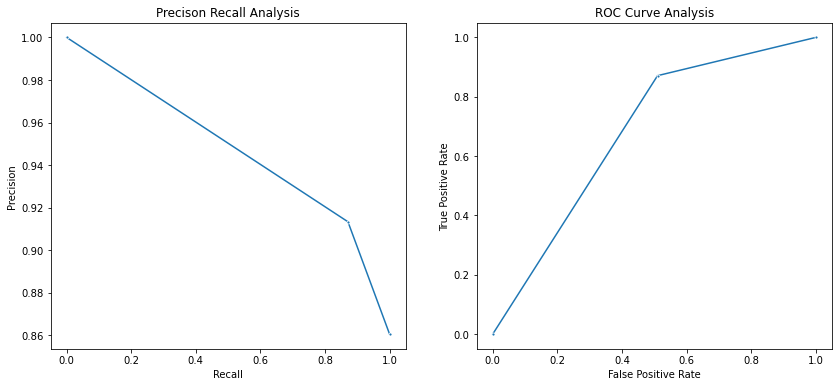

In [85]:
## Resampled data with all the features for Logistic:
evaluate_model(gs_lr, X_res_smoteen, y_res_smoteen, X_test, y_test,"Logistic Regression-SMOTEEN-All Features")

Train Precision-Recall report= (0.826803892882904, 0.819527436047647, 0.8175032115124903, None)
Test Precision-Recall report= (0.8783299757863403, 0.7242671368745868, 0.765624882802842, None)
Train Accuracy Score= 0.819527436047647
Test Accuracy Score= 0.7242671368745868
[[1088  176]
 [2326 5484]]
              precision    recall  f1-score   support

           0       0.32      0.86      0.47      1264
           1       0.97      0.70      0.81      7810

    accuracy                           0.72      9074
   macro avg       0.64      0.78      0.64      9074
weighted avg       0.88      0.72      0.77      9074

auc: 0.9637090383026079
roc_auc_score: 0.7814680951068899


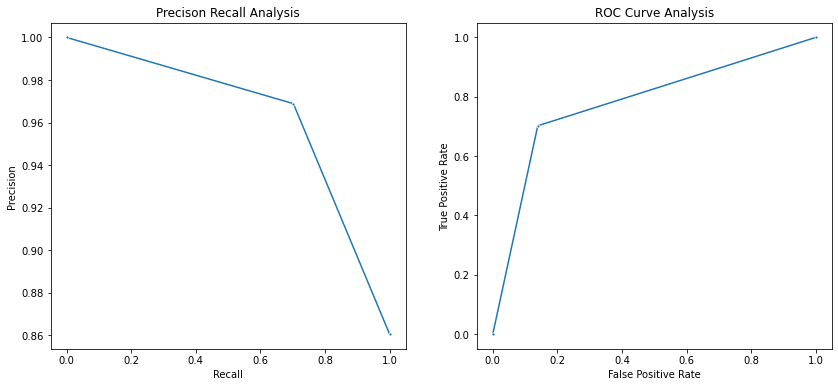

In [86]:
## Logistic with SMOTEEN resampled to balance loan_status(target variable) - with SelectKBest features
evaluate_model(gs_lr, X_res_smoteen_fs, y_res_smoteen_fs, X_test_fs, y_test_fs,"Logistic Regression-SMOTEEN-Best Features")

### 8.2 Random Forest

- Tried running the model for all the variables except target variable and first 9 features given by the SelectKBest. There was not much change in the performance metric F1 score 0.8, auc = 0.93 for both.
-Running model on resampled data for best features given by SelectKBest has almost similar scores. SelectKBEST has turned to have slightly high f1 scores.
-Running model with resampled data and for smoteenn sampled seems  overfitted as training scores are higher than test scores.

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
pipe_rf = Pipeline([('sc', StandardScaler()),
			('rf', RandomForestClassifier(random_state=42))])

params_rf = {'rf__n_estimators': [300, 400, 500],
             'rf__max_features': ['log2', 'sqrt'],
             'rf__max_depth': [4, 6, 8],
             'rf__min_samples_leaf': [0.1, 0.2, 0.3]}

grid_rf = GridSearchCV(estimator=pipe_rf, param_grid=params_rf, 
                        scoring='roc_auc', n_jobs=-1, pre_dispatch='2*n_jobs',
                        cv=2, verbose=1, return_train_score=False)
  

Fitting 2 folds for each of 54 candidates, totalling 108 fits
Train Precision-Recall report= (0.7373685103774352, 0.8587016422352034, 0.7934232085690783, None)
Test Precision-Recall report= (0.7408060455970257, 0.8607009036808464, 0.7962655837180064, None)
Train Accuracy Score= 0.8587016422352034
Test Accuracy Score= 0.8607009036808464
[[   0 1264]
 [   0 7810]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1264
           1       0.86      1.00      0.93      7810

    accuracy                           0.86      9074
   macro avg       0.43      0.50      0.46      9074
weighted avg       0.74      0.86      0.80      9074

auc: 0.9303504518404232
roc_auc_score: 0.5


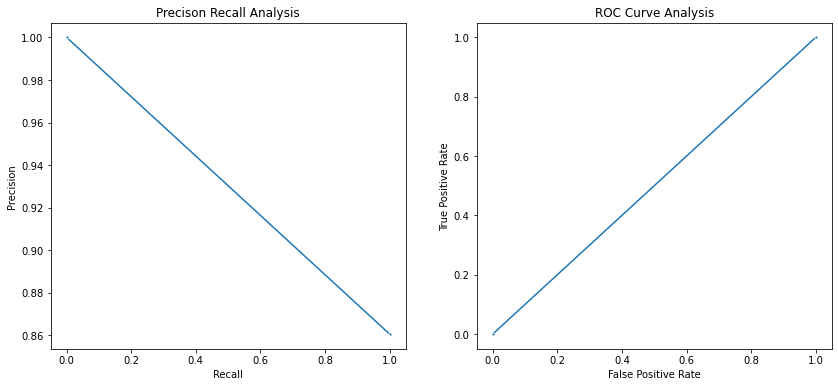

In [89]:
# ### Random Forest with imbalanced data and all the features except target variable:
evaluate_model(grid_rf, X_train, y_train, X_test, y_test,"Random Forest-All Features")

Fitting 2 folds for each of 54 candidates, totalling 108 fits
Train Precision-Recall report= (0.7373685103774352, 0.8587016422352034, 0.7934232085690783, None)
Test Precision-Recall report= (0.7408060455970257, 0.8607009036808464, 0.7962655837180064, None)
Train Accuracy Score= 0.8587016422352034
Test Accuracy Score= 0.8607009036808464
[[   0 1264]
 [   0 7810]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1264
           1       0.86      1.00      0.93      7810

    accuracy                           0.86      9074
   macro avg       0.43      0.50      0.46      9074
weighted avg       0.74      0.86      0.80      9074

auc: 0.9303504518404232
roc_auc_score: 0.5


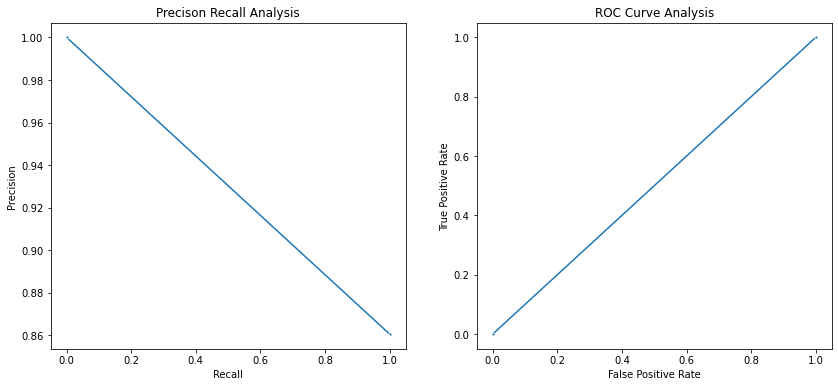

In [90]:
##Evaluating with features given by SelectKBest for Random Forest:
evaluate_model(grid_rf,X_train_fs, y_train_fs, X_test_fs, y_test_fs,"Random Forest-Best Features")

Fitting 2 folds for each of 54 candidates, totalling 108 fits
Train Precision-Recall report= (0.8442902877163297, 0.8335523434077967, 0.8295523387558041, None)
Test Precision-Recall report= (0.8832462332314892, 0.7210711924178973, 0.763266258098154, None)
Train Accuracy Score= 0.8335523434077967
Test Accuracy Score= 0.7210711924178973
[[1122  142]
 [2389 5421]]
              precision    recall  f1-score   support

           0       0.32      0.89      0.47      1264
           1       0.97      0.69      0.81      7810

    accuracy                           0.72      9074
   macro avg       0.65      0.79      0.64      9074
weighted avg       0.88      0.72      0.76      9074

auc: 0.9659320100226042
roc_auc_score: 0.7908841715424885


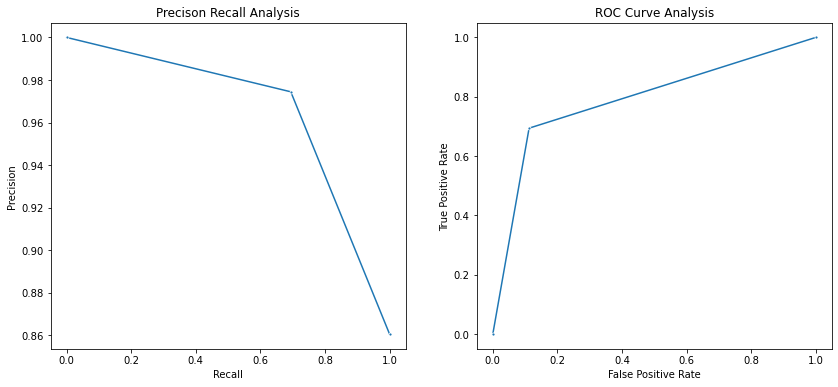

In [91]:
## Resampled data with all the features for Random Forest:
evaluate_model(grid_rf, X_res_smoteen, y_res_smoteen, X_test, y_test,"Random Forest-SMOTEEN-All Features")

Fitting 2 folds for each of 54 candidates, totalling 108 fits
Train Precision-Recall report= (0.8422764812398983, 0.8358523725834798, 0.8342605196903892, None)
Test Precision-Recall report= (0.8873393806577183, 0.7586510910293145, 0.7936069199410782, None)
Train Accuracy Score= 0.8358523725834798
Test Accuracy Score= 0.7586510910293145
[[1109  155]
 [2035 5775]]
              precision    recall  f1-score   support

           0       0.35      0.88      0.50      1264
           1       0.97      0.74      0.84      7810

    accuracy                           0.76      9074
   macro avg       0.66      0.81      0.67      9074
weighted avg       0.89      0.76      0.79      9074

auc: 0.9687827383301751
roc_auc_score: 0.8084050187199144


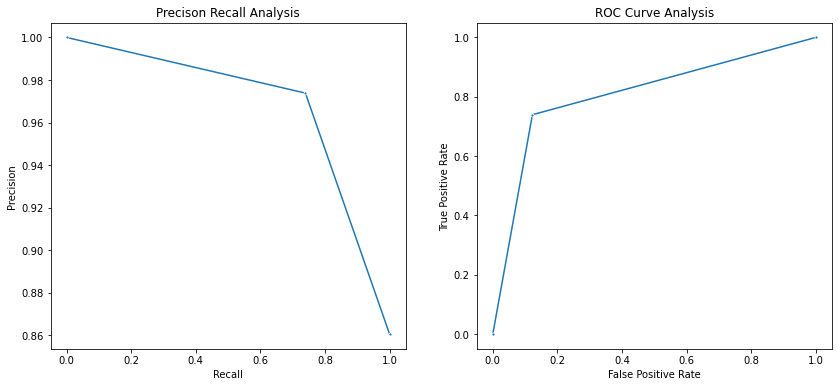

In [92]:
## Random Forest with SMOTEEN resampled to balance loan_status(target variable) - with SelectKBest features
evaluate_model(grid_rf, X_res_smoteen_fs, y_res_smoteen_fs, X_test_fs, y_test_fs,"Random Forest-SMOTEEN-Best Features")

### 8.3 KNN
- Tried running the model for all the variables except target variable and first 9 features given by the SelectKBest. There was not much change in the performance metric. F1 score 0.926, auc = 0.9390 for 1st and F1 Score 0.925, auc = 0.9393 for later
- Running model on resampled data for best features given by SelectKBest has better score(roc_auc_score: 0.772) than running model on resampled data with all the features which gave better performance(roc_auc_score: 0.646)
- Running model with resampled data looks overfitted as training scores are higher than test scores

In [93]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [94]:
from sklearn.metrics import confusion_matrix, accuracy_score,plot_confusion_matrix,classification_report
from sklearn.metrics import recall_score ,precision_recall_fscore_support

In [95]:
pipeline_knn = Pipeline([
       ('scaler', StandardScaler()),
        ('lda', LinearDiscriminantAnalysis()),
        ('model', KNeighborsClassifier())
])

param_grid_knn = {'model__n_neighbors': [5,7,19,25,73,125] # The 'k' in k-nearest neighbors
                 }

grid_knn = GridSearchCV(estimator=pipeline_knn, param_grid=param_grid_knn, 
                        scoring='roc_auc', cv=5, return_train_score=False)

In [96]:
## KNN with imbalanced data and all the features except target variable

Train Precision-Recall report= (0.8389137861127599, 0.8666372754326023, 0.8377012121692446, None)
Test Precision-Recall report= (0.8382941712945822, 0.8673132025567556, 0.8367947505499469, None)
Train Accuracy Score= 0.8666372754326023
Test Accuracy Score= 0.8673132025567556
[[ 234 1030]
 [ 174 7636]]
              precision    recall  f1-score   support

           0       0.57      0.19      0.28      1264
           1       0.88      0.98      0.93      7810

    accuracy                           0.87      9074
   macro avg       0.73      0.58      0.60      9074
weighted avg       0.84      0.87      0.84      9074

auc: 0.9390206204287399
roc_auc_score: 0.5814237264785491


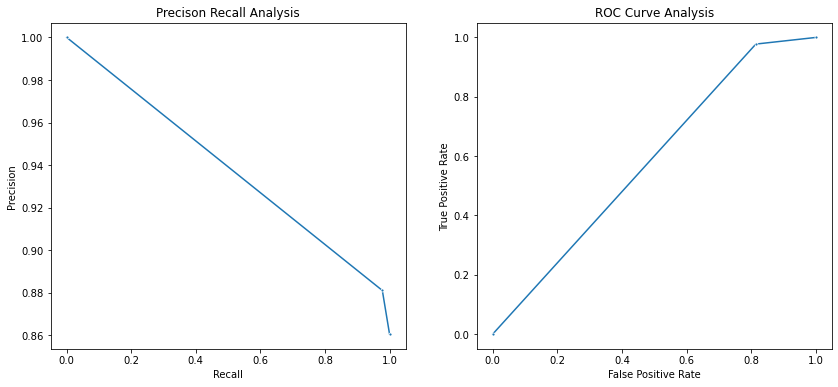

In [97]:
evaluate_model(grid_knn, X_train, y_train, X_test, y_test,"KNN-All features")

Train Precision-Recall report= (0.8386787912263295, 0.8661229288364746, 0.8394423511216186, None)
Test Precision-Recall report= (0.8354149757208875, 0.8652193079127176, 0.8373565202417211, None)
Train Accuracy Score= 0.8661229288364746
Test Accuracy Score= 0.8652193079127176
[[ 253 1011]
 [ 212 7598]]
              precision    recall  f1-score   support

           0       0.54      0.20      0.29      1264
           1       0.88      0.97      0.93      7810

    accuracy                           0.87      9074
   macro avg       0.71      0.59      0.61      9074
weighted avg       0.84      0.87      0.84      9074

auc: 0.9393917637700946
roc_auc_score: 0.5865067707742426


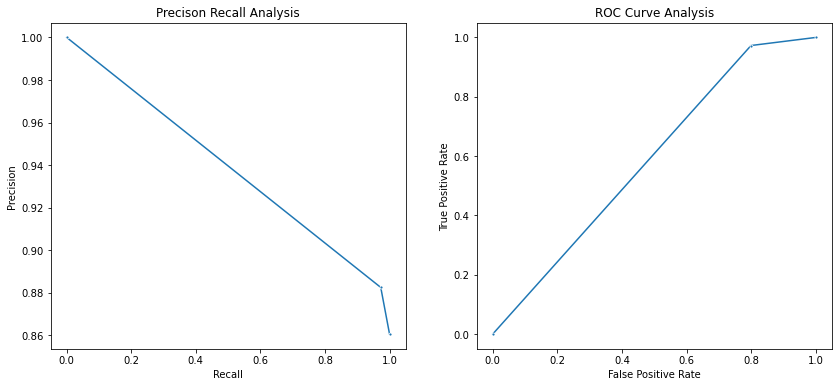

In [98]:
##Evaluating with features given by SelectKBest
evaluate_model(grid_knn,X_train_fs, y_train_fs, X_test_fs, y_test_fs,"KNN-Best features")

Train Precision-Recall report= (0.8882113625738758, 0.8871368082931815, 0.8873603024665849, None)
Test Precision-Recall report= (0.827608343897654, 0.8197046506502094, 0.8234624668160077, None)
Train Accuracy Score= 0.8871368082931815
Test Accuracy Score= 0.8197046506502094
[[ 513  751]
 [ 885 6925]]
              precision    recall  f1-score   support

           0       0.37      0.41      0.39      1264
           1       0.90      0.89      0.89      7810

    accuracy                           0.82      9074
   macro avg       0.63      0.65      0.64      9074
weighted avg       0.83      0.82      0.82      9074

auc: 0.943188865947798
roc_auc_score: 0.6462690845880809


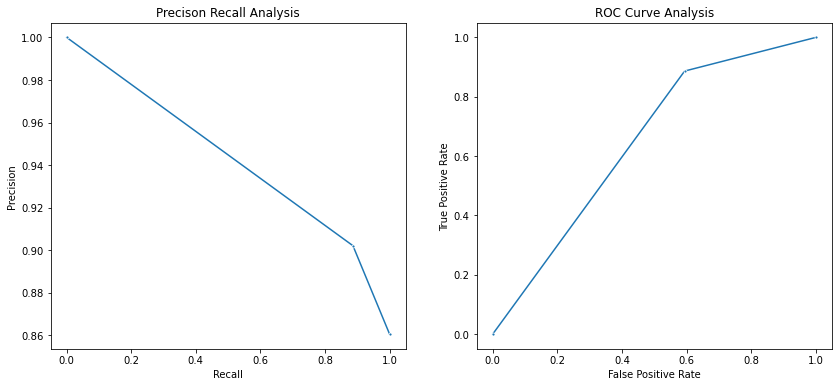

In [99]:
## Resampled data with all the features
evaluate_model(grid_knn, X_res_smoteen, y_res_smoteen, X_test, y_test,"KNN-SMOTEEN-All features")

In [100]:
## KNN with SMOTEEN resampled to balance loan_status(target variable) - with SelectKBest features

Train Precision-Recall report= (0.8226539213727031, 0.8198398750244092, 0.8187709557144724, None)
Test Precision-Recall report= (0.8725584943311732, 0.7398060392329733, 0.7776067149314816, None)
Train Accuracy Score= 0.8198398750244092
Test Accuracy Score= 0.7398060392329733
[[1033  231]
 [2130 5680]]
              precision    recall  f1-score   support

           0       0.33      0.82      0.47      1264
           1       0.96      0.73      0.83      7810

    accuracy                           0.74      9074
   macro avg       0.64      0.77      0.65      9074
weighted avg       0.87      0.74      0.78      9074

auc: 0.9614648277092974
roc_auc_score: 0.7722597813578826


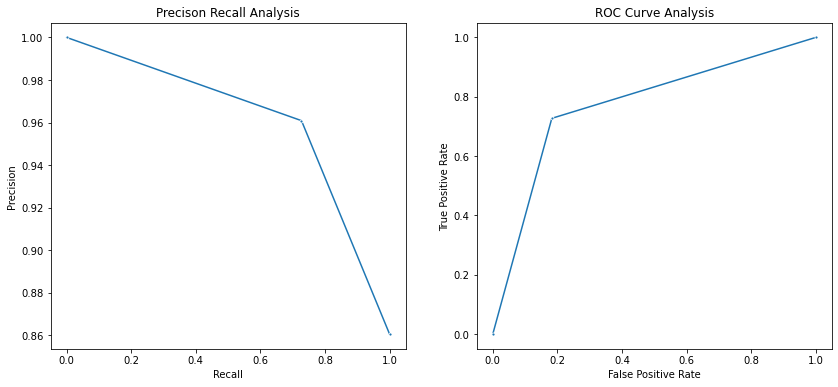

In [101]:
evaluate_model(grid_knn, X_res_smoteen_fs, y_res_smoteen_fs, X_test_fs, y_test_fs,"KNN-SMOTEEN-Best features")

## 8.4 XGBoost model
- Tried running the model for all the variables except target variable and first 9 features given by the SelectKBest. There was not much change in the performance metric. f1 score: 0.930, auc: 0.941 for 1st and f1 score: 0.929,auc: 0.941 for later
- running model on resampled data for best features given by SelectKBest has better score(roc_auc_score: 0.7555679589620578) than running model on resampled data with all the features(roc_auc_score: 0.7450291941522552) 
- Running model on resampled data looks overfitted as traning scores are more than test scores


In [102]:
#max_depth = 6, overfitting. increasing max_depth was more overfitting
#min_child_weight:1 - overfitting, changed it to 2 now model fits better

xbg_params = {'colsample_bytree': 0.5,
        'learning_rate': 0.05,
        'max_depth': 2,
        'min_child_weight': 2,
        'n_estimators': 250,
        'subsample': 1
        }

gmodel = xgb.XGBClassifier(random_state=42,**xbg_params)

[14:36:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Precision-Recall report= (0.8492105054923808, 0.8721113927771043, 0.8461526588491779, None)
Test Precision-Recall report= (0.8510496924130893, 0.8738152964513995, 0.846416054610126, None)
Train Accuracy Score= 0.8721113927771043
Test Accuracy Score= 0.8738152964513995
[[ 279  985]
 [ 160 7650]]
              precision    recall  f1-score   support

           0       0.64      0.22      0.33      1264
           1       0.89      0.98      0.93      7810

    accuracy                           0.87      9074
   macro avg       0.76      0.60      0.63      9074
weighted avg       0.85      0.87      0.85      9074

auc: 0.9415377992857691
roc_auc_score: 0.6001206462017212


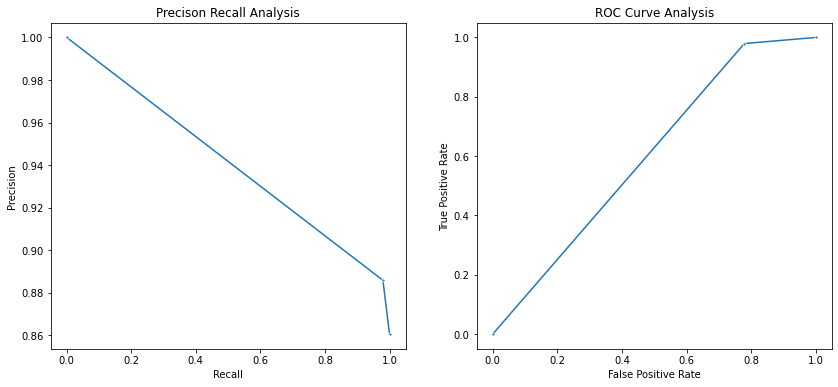

In [103]:
evaluate_model(gmodel, X_train, y_train, X_test, y_test,"XGBoost-All features")

[14:36:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Precision-Recall report= (0.8471162650077223, 0.870825526286785, 0.8460499917381924, None)
Test Precision-Recall report= (0.8483417359158569, 0.8722724267136874, 0.8469593945349487, None)
Train Accuracy Score= 0.870825526286785
Test Accuracy Score= 0.8722724267136874
[[ 296  968]
 [ 191 7619]]
              precision    recall  f1-score   support

           0       0.61      0.23      0.34      1264
           1       0.89      0.98      0.93      7810

    accuracy                           0.87      9074
   macro avg       0.75      0.60      0.63      9074
weighted avg       0.85      0.87      0.85      9074

auc: 0.9419323912053754
roc_auc_score: 0.6048606946627985


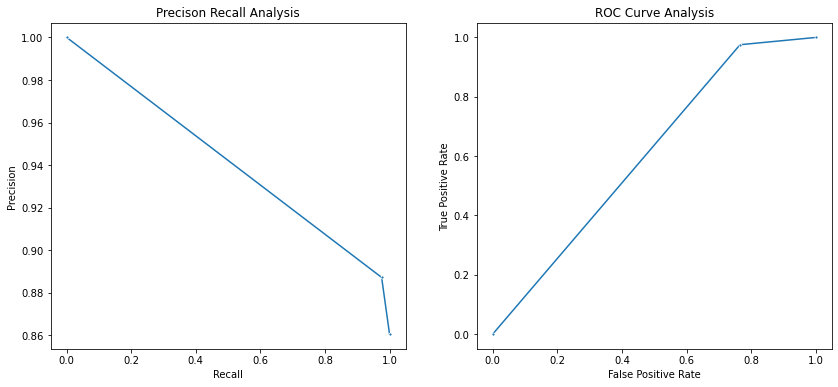

In [104]:
##Evaluating with features given by SelectKBest
evaluate_model(gmodel,X_train_fs, y_train_fs, X_test_fs, y_test_fs,"XGBoost-Best features")

In [105]:
## XGBoost with SMOTEEN resampled to balance loan_status(target variable)

[14:36:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Precision-Recall report= (0.9035020492881635, 0.9035625638779384, 0.9034099703964411, None)
Test Precision-Recall report= (0.8644415844213986, 0.8344721181397399, 0.8461417917225659, None)
Train Accuracy Score= 0.9035625638779384
Test Accuracy Score= 0.8344721181397399
[[ 785  479]
 [1023 6787]]
              precision    recall  f1-score   support

           0       0.43      0.62      0.51      1264
           1       0.93      0.87      0.90      7810

    accuracy                           0.83      9074
   macro avg       0.68      0.75      0.71      9074
weighted avg       0.86      0.83      0.85      9074

auc: 0.9579151505615086
roc_auc_score: 0.7450291941522552


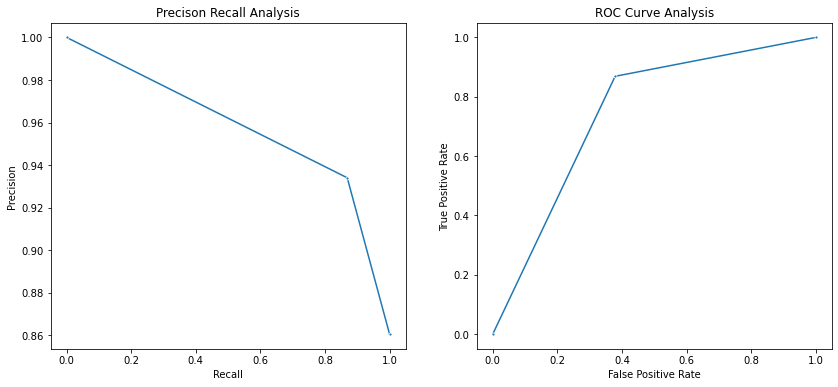

In [106]:
## Resampled data with all the features
evaluate_model(gmodel, X_res_smoteen, y_res_smoteen, X_test, y_test,"XGBoost-SMOTEEN-All features")

In [107]:
## XGBoost with SMOTEEN resampled to balance loan_status(target variable) - with SelectKBest features

[14:36:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Precision-Recall report= (0.8982472779720293, 0.8981448935754736, 0.8980637797360431, None)
Test Precision-Recall report= (0.8675863951876845, 0.8314965836455808, 0.844994201760872, None)
Train Accuracy Score= 0.8981448935754736
Test Accuracy Score= 0.8314965836455808
[[ 822  442]
 [1087 6723]]
              precision    recall  f1-score   support

           0       0.43      0.65      0.52      1264
           1       0.94      0.86      0.90      7810

    accuracy                           0.83      9074
   macro avg       0.68      0.76      0.71      9074
weighted avg       0.87      0.83      0.84      9074

auc: 0.9594617560170522
roc_auc_score: 0.7555679589620578


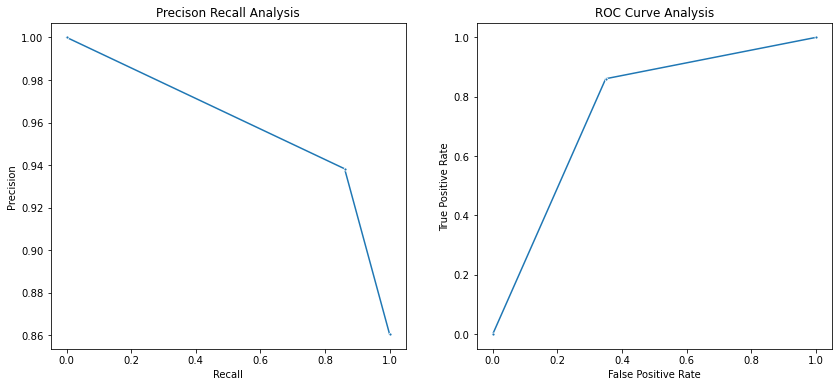

In [108]:
evaluate_model(gmodel, X_res_smoteen_fs, y_res_smoteen_fs, X_test_fs, y_test_fs,"XGBoost-SMOTEEN-Best features")

In [109]:
# Tried running GridSearch for XGBoost on Google colab as it was taking a lot of time to run on my machine.
# There was no significant difference in performance metric. Hence keeping the XGBoost model done above

In [110]:
#pipeline_xgb = Pipeline([
#       ('scaler', StandardScaler()),
#        ('lda', LinearDiscriminantAnalysis()),
#        ('model', xgb.XGBClassifier(random_state=42,subsample=1,colsample_bytree=0.5))
#])
#param_grid_xgb = {'model__max_depth': [2,4,6,8],
#                  'model__learning_rate': [0.05,0.01],
#                  'model__min_child_weight': [1,2,3,4],
#                  'model__n_estimators': [100,250,300,450]
#                 }
#grid_xgb = GridSearchCV(estimator=pipeline_xgb, param_grid=param_grid_xgb,
#                        scoring='roc_auc', cv=5, return_train_score=False)
#evaluate_model(grid_xgb, X_train, y_train, X_test, y_test)

## 10. Comparision of models

In [ ]:
comparision_df = pd.DataFrame(model_comparision_list)

In [127]:
comparision_df

,Model name,f1-score,precision,recall,auc,roc_auc_curve,accuracy
0,Logistic Regression-All Features,0.84,0.84,0.87,0.94,0.58,0.87
1,Logistic Regression-Best Features,0.84,0.84,0.87,0.94,0.58,0.87
2,Logistic Regression-SMOTEEN-All Features,0.83,0.84,0.82,0.95,0.68,0.82
3,Logistic Regression-SMOTEEN-Best Features,0.77,0.88,0.72,0.96,0.78,0.72
4,Random Forest-All Features,0.80,0.74,0.86,0.93,0.50,0.86
5,Random Forest-Best Features,0.80,0.74,0.86,0.93,0.50,0.86
6,Random Forest-SMOTEEN-All Features,0.76,0.88,0.72,0.97,0.79,0.72
7,Random Forest-SMOTEEN-Best Features,0.79,0.89,0.76,0.97,0.81,0.76
8,KNN-All features,0.84,0.84,0.87,0.94,0.58,0.87
9,KNN-Best features,0.84,0.84,0.87,0.94,0.59,0.87


## 10. Observations:
- Based on Accuracy : 
    - XGBoost : Training Score (0.87) - Testing Score(0.87)
    - KNN     : Training Score(0.87) and Testing Score(0.87)
- Based on F1 Score
    - XGBoost             : Training Score(0.85) - Testing Score(0.85)
    - Logistic Regression : Training Score(0.84) and Testing Score(0.84)

<b>XGBoost model</b> performed better in both cases and model doesn’t look overfitted or under fitted.